Ahmed Baari  
126156004  
G-03

# AutoCorrelation Function and Partial AutoCorrelation Function
In this exercise, lets demonstrate ACF and PACF.

#### Importing Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("suprematism/daily-minimum-temperatures")

print("Path to dataset files:", path)

100%|██████████| 13.7k/13.7k [00:00<00:00, 18.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/suprematism/daily-minimum-temperatures/versions/1


In [3]:
ls $path

1_Daily_minimum_temps.csv


In [4]:
dataset_path = path + '/1_Daily_minimum_temps.csv'

In [6]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(dataset_path, index_col='Date', parse_dates=True)
df.head()

<ipython-input-7-5a585c7be1fa>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(dataset_path, index_col='Date', parse_dates=True)


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


The problem here is that the temperatures are string values. We need to convert them to float.

In [9]:
df.dtypes

,0
Temp,object


In [12]:
df['Temp'].unique()

array(['20.7', '17.9', '18.8', '14.6', '15.8', '17.4', '21.8', '20',
       '16.2', '13.3', '16.7', '21.5', '25', '20.6', '24.8', '17.7',
       '15.5', '18.2', '12.1', '14.4', '16', '16.5', '18.7', '19.4',
       '17.2', '15.1', '15.4', '15.3', '21.9', '19.9', '16.6', '16.8',
       '17.1', '15', '13.7', '13.9', '18.3', '22', '22.1', '21.2', '18.4',
       '16.1', '15.7', '18.5', '16.9', '17.5', '17.8', '18.6', '17',
       '14.3', '11.4', '16.3', '11.8', '12.2', '14.7', '11.3', '10.6',
       '11.7', '14.2', '11.2', '8.1', '8', '8.8', '13.4', '10.9', '11',
       '14.5', '18.1', '10', '14.9', '15.9', '13', '7.6', '11.5', '13.5',
       '12.4', '13.2', '13.8', '9', '9.8', '8.9', '7.4', '9.9', '9.3',
       '8.6', '11.9', '14', '12', '10.5', '10.7', '10.1', '5.3', '6.6',
       '8.5', '5.9', '3.2', '2.1', '3.4', '5.4', '9.6', '12.3', '12.6',
       '12.8', '11.6', '5.7', '7.1', '2.5', '3.5', '4.6', '7.7', '10.4',
       '9.2', '6.1', '2.7', '4.3', '6.3', '3.8', '4.4', '4.8', '5.8',
   

There is another problem. Some values are '?0.2', '?0.8' etc. which we cannot convert to float

In [21]:
# Find '?0.2' in the 'Temp' column and replace it with 0.2
df['Temp'] = df['Temp'].astype(str).str.replace(r"?", "")

In [22]:
df['Temp'].astype('float')

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


Convert to float

In [23]:
df['Temp'] = df['Temp'].astype('float')

## Auto Correlation Function

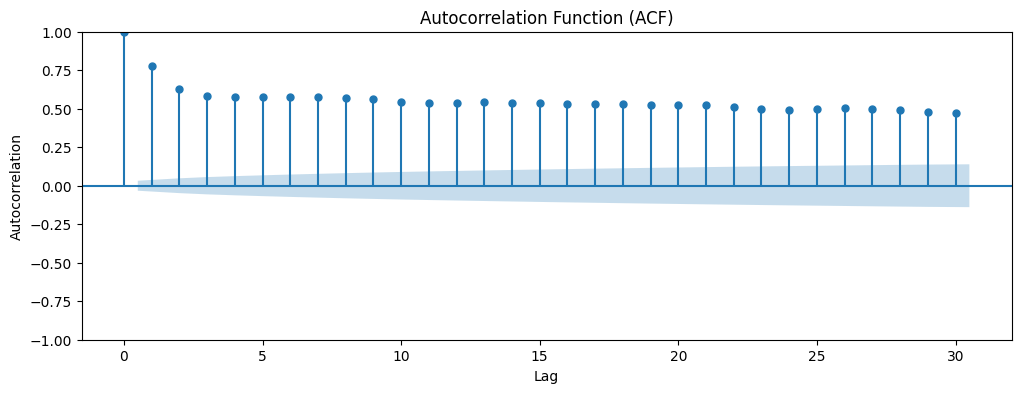

In [24]:
plt.figure(figsize=(12, 4))
plot_acf(df['Temp'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

## Partial Auto Correlation Function

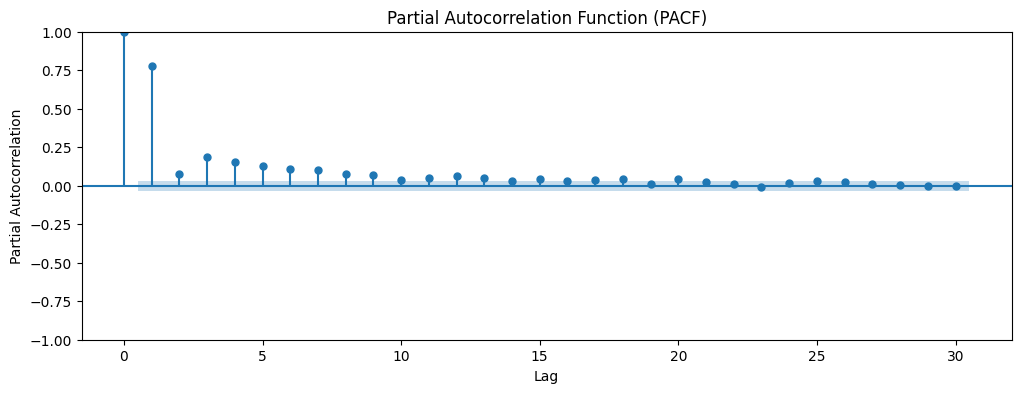

In [25]:
plt.figure(figsize=(12, 4))
plot_pacf(df['Temp'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
# thank you